# Main notebook

Install all requirements and connect to drive

In [1]:
!pip install pygame
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/TrainsWithBrains

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/TrainsWithBrains


### Set up the evn

In [2]:
from train import Train
from railway import Railway
from subwaysystem import SubwaySystem
import pandas as pd
import numpy as np
import random
from ddqp import DDQNAgent
import tensorflow as tf
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

linje1coords = pd.read_csv("lines/linje1.csv", index_col=0)
linje2coords = pd.read_csv("lines/linje2.csv", index_col=0)
linje4coords = pd.read_csv("lines/linje4.csv", index_col=0)
linje5coords = pd.read_csv("lines/linje5.csv", index_col=0)
linje6coords = pd.read_csv("lines/linje6.csv", index_col=0)

linje2stops = pd.concat([linje2coords[linje2coords.index==4] ,linje2coords.sample()])
linje2stops[["stop_time", "active"]] = [[500,False],[300, False]]

linje4stops = pd.concat([linje4coords.sample()])
linje4stops[["stop_time", "active"]] = [[500,False]]


subwaysystem = SubwaySystem()

# Add all lines
linje1 = Railway(linje1coords)
linje2 = Railway(linje2coords, linje2stops)
linje4 = Railway(linje4coords, linje4stops, train_loop_strategy="line")
linje5 = Railway(linje5coords, train_loop_strategy="loop")
linje6 = Railway(linje6coords, train_loop_strategy="loop")

# Add all trains
linje1.add_train(Train())
linje2.add_train(Train(direction = 1, max_speed = 150))
linje2.add_train(Train(direction = -1))
linje4.add_train(Train())
linje5.add_train(Train())
linje6.add_train(Train())


# Add lines inn system
#subwaysystem.add_railway(linje1)
#subwaysystem.add_railway(linje2)
#subwaysystem.add_railway(linje4)
subwaysystem.add_railway(linje5)
subwaysystem.add_railway(linje6)


pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Reinformant learning

In [ ]:
#subwaysystem.find_intersections()
#subwaysystem.render()
#subwaysystem.run_simualation()
#subwaysystem.reset()


# ========
# Reinformant learning!
# ========

agent = DDQNAgent(alpha=0.005, gamma=0.99, n_actions=2, max_speed=100,
                  epsilon=1.0, batch_size=32, input_dims=8)
r_history = []

n_games = 2
done = False
max_interations = 5000


for i in range(n_games):
    score = 0
    o = 0
    state, done = subwaysystem.reset()
    
    actions = []
    states = []
    states_ = []
    rewards = []
    dones = []
    speeds = []
    distances = []
        
        # Do action on env
    while not done:
        
        action = agent.choose_action(state)


        n = 5
        for _ in range(n):
            o += 1
            state_, reward, done, info = subwaysystem.step(action)
            score += reward
            
            # Save things on the way
            rewards.append(reward)
            speeds.append([train.speed for train,_,_ in subwaysystem.trains])
            distances.append(pdist([train.position for train,_,_ in subwaysystem.trains]))
            agent.remeber(state, action, reward, state_, done)
            
            subwaysystem.save_image(o)
            state = state_

        
        agent.learn()


        if o%100 == 0:
            print(o, [train.speed for train,_,_ in subwaysystem.trains])
            
        if o>max_interations:
            done = True
            print("stopper pga maxinteretatoion")
            
    
            
        

        # == Learn from action ==
        #agent.discount_reward()
        # agent.learn(tape)
        
        #r_history.append(score)
        

distances = np.array(distances)
speeds = np.array(speeds)


100 [5.929935075605134, 6.055217375523561]
200 [12.297306123352318, 11.915213381282628]


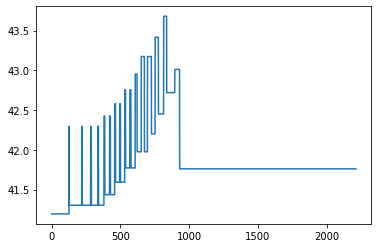

In [4]:
plt.plot(distances)

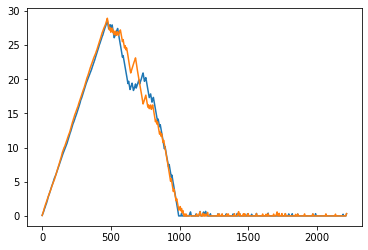

In [5]:
plt.plot(speeds)

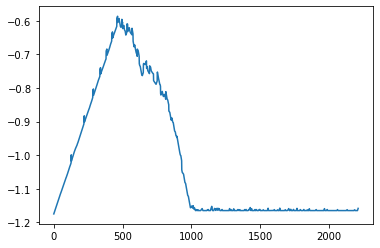

In [6]:
plt.plot(rewards)

In [7]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/stianteien/TrainsWithBrains
   ed822c9..f8cdaf4  master     -> origin/master
Updating ed822c9..f8cdaf4
Fast-forward
 subwaysystem.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


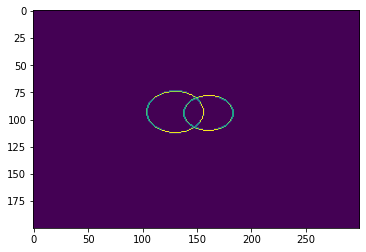

In [4]:
plt.imshow(subwaysystem.frame.T)

/bin/bash: ffpmeg: command not found
